Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('_Cities.csv')

# Generate a prediction graph where
# latitude as the independent variable and
# temperature as dependent variable

x = data['latitude']
y = data['temperature']

# get the average of each coordinate

meanX = np.mean(x)
meanY = np.mean(y)

print(meanX)
print(meanY)

# deduct each data by the mean

x_mean = x.copy()
y_mean = y.copy()

print(x_mean)

print(y_mean)

for i in range(len(x_mean)):
  x_mean[i] -= meanX
  y_mean[i] -= meanY

# get the product of the reduced mean of both x and y and add them
# get the square of the reduced mean of x and add them

xy_mean = x_mean.copy()
xx_mean = x_mean.copy()

for i in range(len(x_mean)):
  xy_mean[i] *= y_mean[i]
  xx_mean[i] **= 2

xy_sum = np.sum(xy_mean)
xx_sum = np.sum(xx_mean)

m = xy_sum / xx_sum # slope

# y = mx + b
# y - b = mx + b - b
# y - b = mx
# y - b - y = mx - y
# -b = mx - y
# -1(-b) = -1(mx - y)
# b = -mx + y
# b = y - mx

print("x - mean(x): " + str(x_mean))
print("y - mean(y): " + str(y_mean))
print("x - mean(x) * y - mean(y): " + str(xy_mean))
print("x - mean(x) ^ 2: " + str(xx_mean))
print("sum of x - mean(x) * y - mean(y): " + str(xy_sum))
print("sum of x - mean(x): " + str(xx_sum))
print("Slope: " + str(m))

b = round(meanY - m * meanX, 10) # y-intercept

print("y-Intercept: " + str(b))


47.499906103286385
9.497840375586854
0      57.03
1      57.17
2      63.35
3      36.99
4      39.00
       ...  
208    45.20
209    41.65
210    50.25
211    41.43
212    47.38
Name: latitude, Length: 213, dtype: float64
0       7.52
1       8.10
2       0.20
3      18.67
4      12.62
       ...  
208    10.02
209    14.17
210     6.67
211    10.64
212     6.68
Name: temperature, Length: 213, dtype: float64
x - mean(x): 0       9.530094
1       9.670094
2      15.850094
3     -10.509906
4      -8.499906
         ...    
208    -2.299906
209    -5.849906
210     2.750094
211    -6.069906
212    -0.119906
Name: latitude, Length: 213, dtype: float64
y - mean(y): 0     -1.97784
1     -1.39784
2     -9.29784
3      9.17216
4      3.12216
        ...   
208    0.52216
209    4.67216
210   -2.82784
211    1.14216
212   -2.81784
Name: temperature, Length: 213, dtype: float64
x - mean(x) * y - mean(y): 0      -18.849004
1      -13.517248
2     -147.371643
3      -96.398536
4      -26.538064


In [ ]:
# yp = y prediction

yp = x.copy()
for i in range(len(yp)):
  yp[i] = round(m * yp[i] + b, 10)

yp_mean = yp.copy()
for i in range(len(yp)):
  yp_mean[i] = round(yp_mean[i] - meanY, 10)

ypy_mean = yp_mean.copy()
yy_mean = y_mean.copy()

for i in range(len(yp_mean)):
  ypy_mean[i] = round(ypy_mean[i] ** 2, 10)
  yy_mean[i] = round(yy_mean[i] ** 2, 10)

ypy_sum = round(np.sum(ypy_mean), 10)
yy_sum = round(np.sum(yy_mean), 10)

r = (round(ypy_sum / yy_sum, 10) ** 0.5)

print("y-prediction: " + str(yp))
print("yp - mean(y): " + str(yp_mean))
print("yp - mean(y) ^ 2: " + str(ypy_mean))
print("y - mean(y) ^ 2: " + str(yy_mean))
print("sum of yp - mean(y) ^ 2: " + str(ypy_sum))
print("sum of y - mean(y) ^ 2: " + str(yy_sum))
print("R: " + str(r))

y-prediction: 0       5.342538
1       5.281495
2       2.586898
3      14.080360
4      13.203961
         ...    
208    10.500643
209    12.048511
210     8.298747
211    12.144435
212     9.550122
Name: latitude, Length: 213, dtype: float64
yp - mean(y): 0     -4.155302
1     -4.216345
2     -6.910943
3      4.582519
4      3.706121
         ...   
208    1.002803
209    2.550670
210   -1.199093
211    2.646595
212    0.052281
Name: latitude, Length: 213, dtype: float64
yp - mean(y) ^ 2: 0      17.266538
1      17.777566
2      47.761129
3      20.999482
4      13.735332
         ...    
208     1.005614
209     6.505920
210     1.437825
211     7.004463
212     0.002733
Name: latitude, Length: 213, dtype: float64
y - mean(y) ^ 2: 0       3.911853
1       1.953958
2      86.449836
3      84.128512
4       9.747881
         ...    
208     0.272651
209    21.829076
210     7.996681
211     1.304529
212     7.940224
Name: temperature, Length: 213, dtype: float64
sum of yp - mean(y) ^

In [ ]:
margin = y.copy()
for i in range(len(margin)):
  margin[i] = abs(round(margin[i] - yp[i], 10))
print(margin)

0      2.177462
1      2.818505
2      2.386898
3      4.589640
4      0.583961
         ...   
208    0.480643
209    2.121489
210    1.628747
211    1.504435
212    2.870122
Name: temperature, Length: 213, dtype: float64


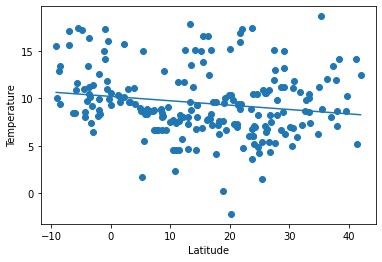

In [ ]:
x_new = np.linspace(np.min(x), np.max(x))

y_new = m * x_new + b

plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.plot(x_new, y_new)
plt.scatter(x, y)

In [ ]:
x_out = int(input("Input latitude: "))
y_out = m * x_out + b
print("The temperature is: " + str(y_out))

Input latitude: 40
The temperature is: 12.767942234734019
